In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(160)

d = pd.read_csv("data4a.csv", dtype={"y":int, "x":float, "f":"category"})

In [5]:
d.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [6]:
d.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [7]:
d.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

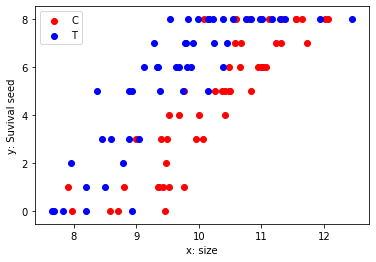

In [12]:
x_c = d.x[d.f=="C"]
y_c = d.y[d.f=="C"]

x_t = d.x[d.f=="T"]
y_t = d.y[d.f=="T"]

plt.scatter(x_c, y_c, c="red", label="C")
plt.scatter(x_t, y_t, c="blue", label="T")
plt.xlabel("x: size")
plt.ylabel("y: Suvival seed")
plt.legend()

In [14]:
d.head()

,N,y,x,f
95,8,7,10.45,T
96,8,0,8.94,T
97,8,5,8.94,T
98,8,8,10.14,T
99,8,1,8.50,T


In [15]:
d.tail()

,N,y,x,f
95,8,7,10.45,T
96,8,0,8.94,T
97,8,5,8.94,T
98,8,8,10.14,T
99,8,1,8.50,T


In [16]:
d.shape

(100, 4)

In [23]:
model = smf.glm("y + I(N-y) ~ x + f", data=d, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Mon, 05 Aug 2019   Deviance:                       123.03
Time:                        03:01:29   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.000       1.568       2.475
x              1.9524      0.139     14.059      0.000       1.680       2.225
==============================================================================
"""

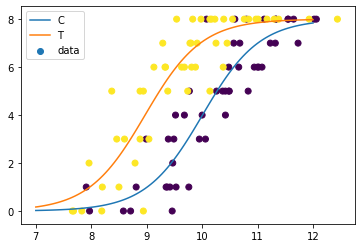

In [24]:
df_test_c = pd.DataFrame()
df_test_c["x"] = np.linspace(7,12,100)
df_test_c["f"] = "C"
predict_c = result.predict(df_test_c)*8

df_test_t = pd.DataFrame()
df_test_t["x"] = np.linspace(7,12,100)
df_test_t["f"] = "T"
predict_t = result.predict(df_test_t)*8

plt.plot(df_test_c.x,predict_c,label="C")
plt.plot(df_test_t.x,predict_t,label="T")
plt.scatter(d.x,d.y,c=d.f.cat.codes,label="data")
plt.legend()

In [25]:
formula_list = ['y + I(N-y)~ 1','y + I(N-y)~ f','y + I(N-y)~ x','y + I(N-y)~ x+f']

for formula in formula_list:
    model = smf.glm(formula,data=d,family=sm.families.Binomial())
    result = model.fit()
    print(formula,-2*(result.llf - (result.df_model+1)))

y + I(N-y)~ 1 644.4093416623778
y + I(N-y)~ f 637.7597534566678
y + I(N-y)~ x 364.345443283716
y + I(N-y)~ x+f 272.2111292852233


In [26]:
model = smf.glm('y + I(N-y)~ x*f',data=d,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Mon, 05 Aug 2019   Deviance:                       122.43
Time:                        03:18:04   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
f[T.T]        -0.0638      2.704     -0.024      0.981      -5.363       5.235
x              1.8525      0.186      9.983      0.000       1.489       2.216
x:f[T.T]       0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

In [33]:
d = pd.read_csv("data4b.csv")
d.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


In [35]:
model = smf.glm("y~x",offset=np.log(d.A),data=d, family=sm.families.Poisson())

In [37]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Thu, 08 Aug 2019   Deviance:                       81.608
Time:                        01:41:34   Pearson chi2:                     81.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

Text(0, 0.5, 'y')

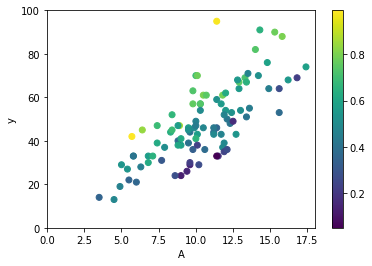

In [43]:
plt.scatter(d.A,d.y,c=d.x)
plt.colorbar()
plt.xlim(0,18)
plt.ylim(0,100)
plt.xlabel("A")
plt.ylabel("y")

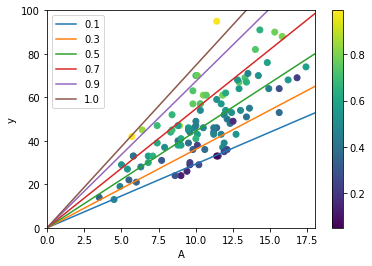

In [49]:
df_predict = pd.DataFrame()
df_predict["x"] = 0
df_predict["A"] = np.arange(0.1,20,0.1)
x_list = [0.1,0.3,0.5,0.7, 0.9]

plt.scatter(d.A,d.y,c=d.x)
plt.colorbar()
plt.xlim(0,18)
plt.ylim(0,100)
plt.xlabel("A")
plt.ylabel("y")
for x in x_list:
    df_predict["x"] = x
    plt.plot(df_predict.A,result.predict(df_predict,offset=np.log(df_predict.A)),label=x)
plt.legend()

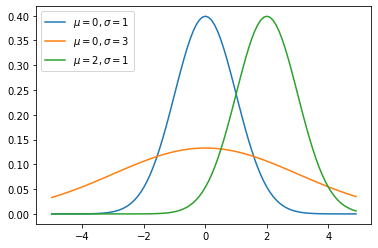

In [56]:
import scipy.stats as sct
y = np.arange(-5,5,0.1)
plt.plot(pd.Series(sct.norm.pdf(y, loc=0, scale=1), index=y), label=r'$\mu=0, \sigma=1$')
plt.plot(pd.Series(sct.norm.pdf(y, loc=0, scale=3), index=y), label=r'$\mu=0, \sigma=3$')
plt.plot(pd.Series(sct.norm.pdf(y, loc=2, scale=1), index=y), label=r'$\mu=2, \sigma=1$')
plt.legend()

In [57]:
def area(begin, end, loc, scale):
    menseki_begin = sct.norm.cdf(x=begin,loc=loc,scale=scale)
    menseki_end = sct.norm.cdf(x=end,loc=loc,scale=scale)
    return menseki_end - menseki_begin

In [58]:
area(1.2, 1.8, 0, 1)

0.07913935110878245

In [66]:
data = pd.read_csv("d.csv",index_col=0)
data.head()

,x,y
1,3.000000,5
2,3.210526,3
3,3.421053,6
4,3.631579,7
5,3.842105,7


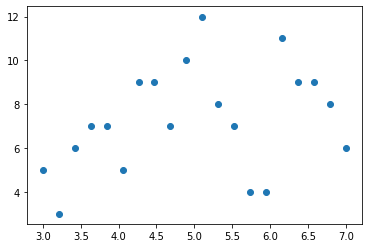

In [68]:
plt.scatter(data.x, data.y)

In [70]:
model = smf.glm('y~np.log(x)',data=data,family=sm.families.Gamma(link=sm.families.links.log))

/Users/shuto/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [72]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                        0.099014
Method:                          IRLS   Log-Likelihood:                -44.256
Date:                Thu, 08 Aug 2019   Deviance:                       2.0292
Time:                        23:31:29   Pearson chi2:                     1.78
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1578      0.443      2.612      0.009       0.289       2.027
np.log(x)      0.5211      0.277      1.879      0.060      -0.022       1.065
==============================================================================
"""

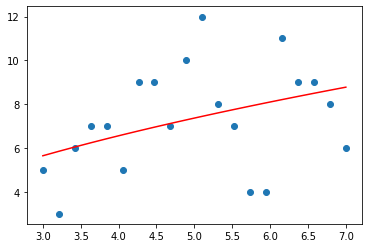

In [76]:

plt.scatter(data.x,data.y)
plt.plot(data.x,result.predict(data.x),c="red")